# Python Data Analysis: Home Exam (2022-2023)

> + **Allocated time:** 12 days
> + **Send your final notebook** at [romain.madar@cern.ch](mailto:romain.madar@cern.ch) before **26/09/2022 23:59:59 CEST** 
>
> **Comment 1**: the final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about Parkinson disease or general medecine to answer the questions asked in this exam.*
>
> **Comment 2**: discussions are encouraged,  with the professor (*via* email or just passing by my office) and between students. However you should make sure to demonstrate that *you understand what is in your notebook*.

## Description of project

The dataset considered in this project describes some music features which are used for musical genres classifications. Typically, this kind of data are behind algorithms that suggest new artists or new songs on streaming platform, based on what you have already listen.

### Structure

The project is structured in three parts, mimincking a realistic data analysis project : 
  + dataset properties and cleaning
  + data exploration
  + toward the design of predictive models

### Data

The data are organized within a `csv` file with 17 features and one "target" which can be organized as follow:

**Factual song properties**
+ `instance_id` is a unique identifier for each song
+ `artist_name` is name of the song artist 
+ `track_name` is the title of the song
+ `obtained_date` is supposed to be the date at which the song was released. Since information seems corrupted and will be ignored in this project.
+ `duration_ms` is the duration of the song, in milliseconds.

**Musical properties**
+ `tempo` measures the beats per minute (bpm) of a song. Many popular songs range from 50 bpm to 200 bpm. The tempo cannot be measured for all songs (*e.g.* variable tempo).
+ `key` is the tonality of the song, roughly high or low pitch (*e.g.* C key means the song is played in C tonality)
+ `mode` is (here) major or minor, which corresponds to two ways to use a given key. Major is usually associated to a happy feeling while mino is more on a dark or sad side.

**Perception properties**
+ `popularity` measures how much people like the song. It can be for example the number of views on a streaming platform, or the number of days in a chart (not exactly sure what is the exact definition).
+ `acousticness`. Songs with higher acousticness are more likely to use acoustic and non-electronic instruments. Acousticness is measured on a scale of 0 (not acoustic) to 100 (very acoustic).
+ `danceability` quantifies how suitable a track is for dancing based on a combination of musical elements, like tempo, rhythm, and beat. Songs with higher danceability have stronger and more regular beats.
+ `energy` measures the perceived intensity and activity of a song. Energy is also measured on a scale of 0 (low energy) to 100 (high energy).
+ `instrumentalness` predicts whether a track contains vocals. Instrumentalness is measured on a scale of 0 (likely contains vocal content) to 100 (likely contains no vocal content).
+ `liveness` detects the presence of an audience in a song. Liveness is measured on a scale of 0 (no audience) to 100 (audible audience).
+ `loudness` measures the decibel level of a song. Decibels are relative to a reference value, so songs with lower loudness values are quieter relative to the reference value of 0.
+ `speechiness` measures the presence of spoken words in a song. Speechiness is measured on a scale of 0 (low speechiness) to 100 (high speechiness).
+ `valence` measures the positivity of a song. Typically, songs with higher valence sound happier and more cheerful. Valence is measured on a scale from 0 (low valence) to 100 (high valence).

**Gender**
+ `music_genre` is the known genre of the music. In the machine learning terminology, this is the *target*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 1. Dataset properties and cleaning (5 pts)

**1.1** Download the dataset `https://github.com/rmadar/lecture-python/data/music_genre.csv`, clicking on [this link](https://github.com/rmadar/lecture-python/raw/master/data/music_genre.csv) (and save it on disk). Load it and find out how many songs and features per song are stored. (1 pts)

In [3]:
df = pd.read_csv('music_genre.csv')
df.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0     0.115    -5.201  Minor       0.0748             100.889         4-Apr   
1     0.124    -7.043  Minor       0.0300  115.00200000000001         4-Apr   
2     0.534    -4.617  Major       0.0345             127.994         4-Apr   
3     0.157    -4.498  Major       0.2390             128.014         4-Apr   
4     0.157    -6.266  Major       0.0413             145.036         4-Apr   

   valence music_genre  
0    0.759  Electronic  
1    0.531  Electronic  
2    0.333  Electronic  
3    0.270  Electronic  
4    0.323  Electronic

**1.2** How many valid songs are present ? Valid means "with all values look reasonnable". We could start checking, for example, that the `instance_id` values are all uniques, as it should. We also recommand to scrutinize the `tempo` feature, starting with the data type. (1.5 pts)

In [4]:
# Check unicity of instance_id
print(df.instance_id.unique().size, df.instance_id.size)

50001 50005


In [5]:
# Count the number of unique elements and they number of occurances
x = df.instance_id.values
vals, counts = np.unique(x, return_counts=True)

# Get the multiple values
imult = counts>1
for v, c in zip(vals[imult], counts[imult]):
    print(f'Value "{v}" has {c} occurences')

Value "nan" has 5 occurences


In [6]:
# Investigate the full dataframe for which instance_ID is nan
df.loc[np.isnan(x)]

instance_id artist_name track_name  popularity  acousticness  \
10000          NaN         NaN        NaN         NaN           NaN   
10001          NaN         NaN        NaN         NaN           NaN   
10002          NaN         NaN        NaN         NaN           NaN   
10003          NaN         NaN        NaN         NaN           NaN   
10004          NaN         NaN        NaN         NaN           NaN   

       danceability  duration_ms  energy  instrumentalness  key  liveness  \
10000           NaN          NaN     NaN               NaN  NaN       NaN   
10001           NaN          NaN     NaN               NaN  NaN       NaN   
10002           NaN          NaN     NaN               NaN  NaN       NaN   
10003           NaN          NaN     NaN               NaN  NaN       NaN   
10004           NaN          NaN     NaN               NaN  NaN       NaN   

       loudness mode  speechiness tempo obtained_date  valence music_genre  
10000       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10001       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10002       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10003       NaN  NaN          NaN   NaN           NaN      NaN         NaN  
10004       NaN  NaN          NaN   NaN           NaN      NaN         NaN

In [7]:
# Check that are no other nan's than this ones by counting 
# the total number of nan's
nNaN_full = np.count_nonzero(df.isna().values)
nNan_id = df.loc[np.isnan(x)].size
print(f'Total number of NaNs is {nNaN_full} among which {nNan_id} come from "id_instance"')

Total number of NaNs is 90 among which 90 come from "id_instance"


In [8]:
# Investigate the obtained_date column 
#  --> only 6 values, which don't really make sense
#  --> it can be safely moved.
print(f'Number unique dates is {df.obtained_date.unique().size}')

Number unique dates is 6


In [9]:
# Check the tempo feature --> type object and not float
print(f'Type of "tempo" : {df.tempo.dtype}')

# A convertion shows that there are songs without tempo
strange_tempo = df.tempo=='?'
print(f'Number of songs with a non-valid tempo: {np.count_nonzero(strange_tempo.values)}')

# Replace those value by a numerical default value, -10
# And actualy convert it to floats.
df.loc[df.tempo == '?', 'tempo'] = -10
df.tempo = df.tempo.astype(np.float64)

# Check that it is now OK
strange_tempo = df.tempo == '?'
print(f'After correction, the same number is {np.count_nonzero(strange_tempo.values)}')

Type of "tempo" : object
Number of songs with a non-valid tempo: 4980
After correction, the same number is 0


**1.3** Create a new dataframe keeping only the valid songs. The songs with a 'bad' tempo are kept at this stage and will be treated later (1 pts)

In [10]:
# Drop the rows 10000-10004
to_be_dropped = np.where(np.isnan(x))[0]
data = df.drop(index = to_be_dropped, axis=0)

# Drop the column obtained date
data = data.drop(labels='obtained_date', axis=1)

# Check the resulting sample is clean
print(f'Number of NaNs in the cleaned data is {np.count_nonzero(data.isna())} among {data.shape[0]} values')

Number of NaNs in the cleaned data is 0 among 50000 values


**1.4** How many genres and songs per genre are contained in this dataset ? (1.5 pts)

In [11]:
# Get the list of unique genres
genres = data.music_genre.unique()
print(f'There are {genres.size} unique genres : ')

# Count the number of row for each genre, using group_by function
for g, d in data.groupby('music_genre'):
    print(f'  + {g} -> {d.shape[0]} songs')

There are 10 unique genres : 
  + Alternative -> 5000 songs
  + Anime -> 5000 songs
  + Blues -> 5000 songs
  + Classical -> 5000 songs
  + Country -> 5000 songs
  + Electronic -> 5000 songs
  + Hip-Hop -> 5000 songs
  + Jazz -> 5000 songs
  + Rap -> 5000 songs
  + Rock -> 5000 songs


## 2. Data exploration (8 pts)

**2.1** Plot the binned distribution (histogram) of each numerical feature. The x-axis of each plot should be properly labelled. (1 pts)

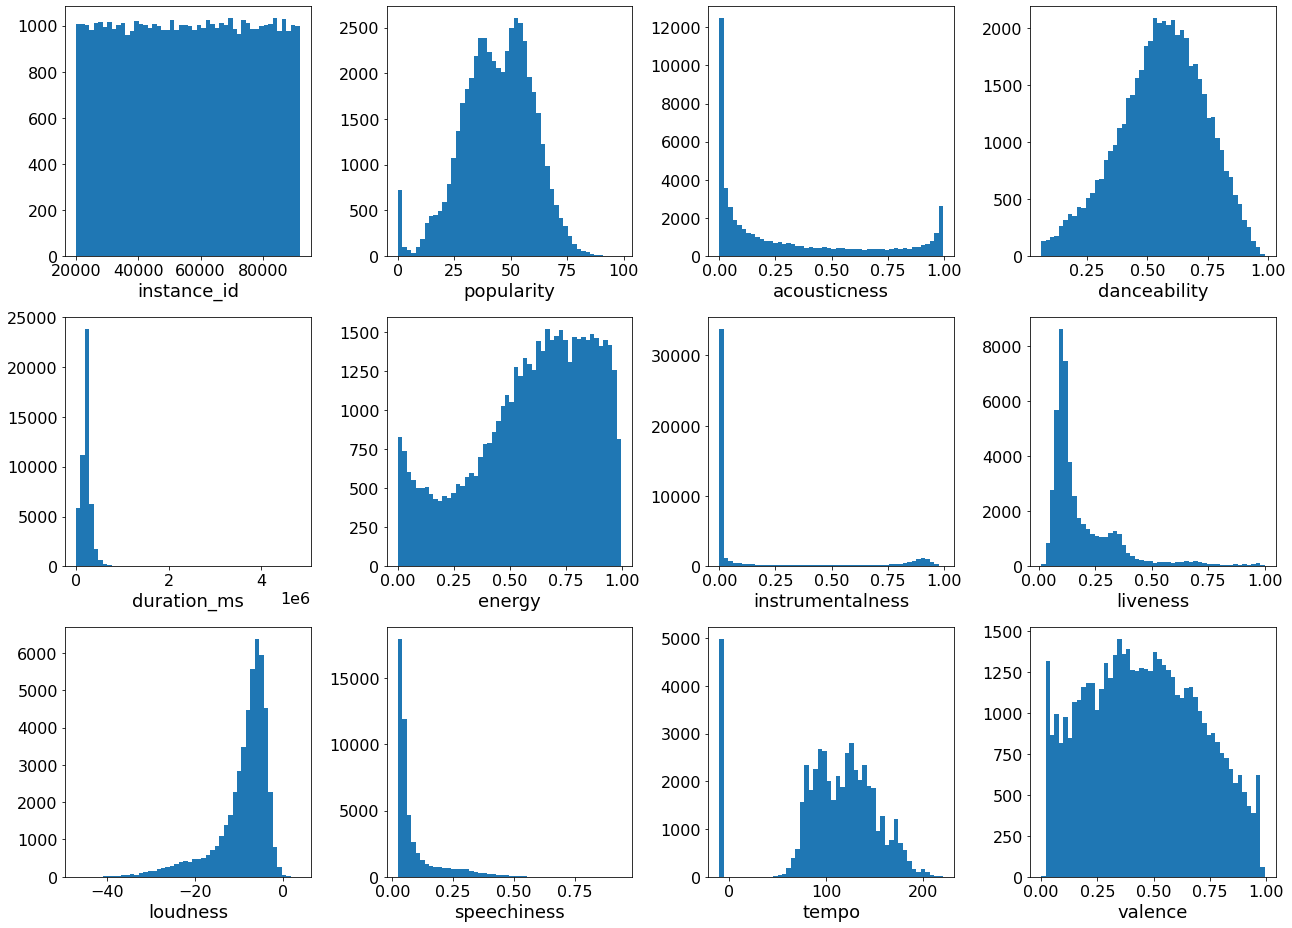

In [12]:
# Extract the list of numerical features
numerical_features = [c for c in data.columns if data[c].dtype==float]


# Create a nice figure to get an overview choosing the number
# of column an line based on the number of total feature.
N = len(numerical_features)
Nsub = int(np.sqrt(N))
if Nsub**2 < N:
    Nx, Ny = Nsub, Nsub+1
else:
    Nx, Ny = Nsub, Nsub

    
# Loop over them and plot the data
plt.figure(figsize=(18, 13))
for i, c in enumerate(numerical_features):
    plt.subplot(Nx, Ny, i+1)
    plt.hist(data[c], bins=50)
    plt.xlabel(c)
plt.tight_layout()

**2.2** In order to have the same typical values for each features, we will *normalize* the data with the following tranformation:
$$
X_{norm} = \frac{X - \langle X \rangle}{\sigma_X}
$$
where $\langle X \rangle$ is the mean value of $X$ and $\sigma_X$ is the standard deviation of $X$. Perform this transformation for each variable, store a new column for each tranformed feature, and reproduce the plots above using the normalized features. (2 pts)

In [13]:
def norm_feature(a):
    '''
    Return a numpy array normalized (mean=0, std=1) based on a
    '''

    # Compute the normalized data
    a_norm = (a - np.mean(a)) / np.std(a)
    
    # Return the result
    return np.array(a_norm)


# Testing the function
x = norm_feature(data.loudness)
print(f'Normalized data has a mean of {np.mean(x):.3f} and a RMS of {np.std(x):.3f}')

Normalized data has a mean of 0.000 and a RMS of 1.000


In [14]:
# Applying to all numerical data 
for c in numerical_features:
    data[f'{c}_norm'] = norm_feature(data[c])
    

# Print the 5 first rows
data.head()

instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  ...  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#  ...   
1       0.01270         0.622     218293.0   0.890           0.95000   D  ...   
2       0.00306         0.620     215613.0   0.755           0.01180  G#  ...   
3       0.02540         0.774     166875.0   0.700           0.00253  C#  ...   
4       0.00465         0.638     222369.0   0.587           0.90900  F#  ...   

   acousticness_norm  danceability_norm duration_ms_norm  energy_norm  \
0          -0.883886           0.524878        -1.719534     1.289876   
1          -0.860390           0.356933        -0.023001     1.097101   
2          -0.888632           0.345737        -0.043830     0.586813   
3          -0.823184           1.207853        -0.422611     0.378918   
4          -0.883974           0.446504         0.008676    -0.048212   

   instrumentalness_norm  liveness_norm loudness_norm  speechiness_norm  \
0               1.875809      -0.488113      0.638132         -0.185322   
1               2.361357      -0.432433      0.339248         -0.627258   
2              -0.521812       2.104140      0.732892         -0.582867   
3              -0.550300      -0.228269      0.752201          1.434452   
4               2.235361      -0.228269      0.465324         -0.515787   

   tempo_norm  valence_norm  
0   -0.125995      1.225073  
1    0.164524      0.302431  
2    0.431968     -0.498812  
3    0.432380     -0.753752  
4    0.782781     -0.539278  

[5 rows x 29 columns]

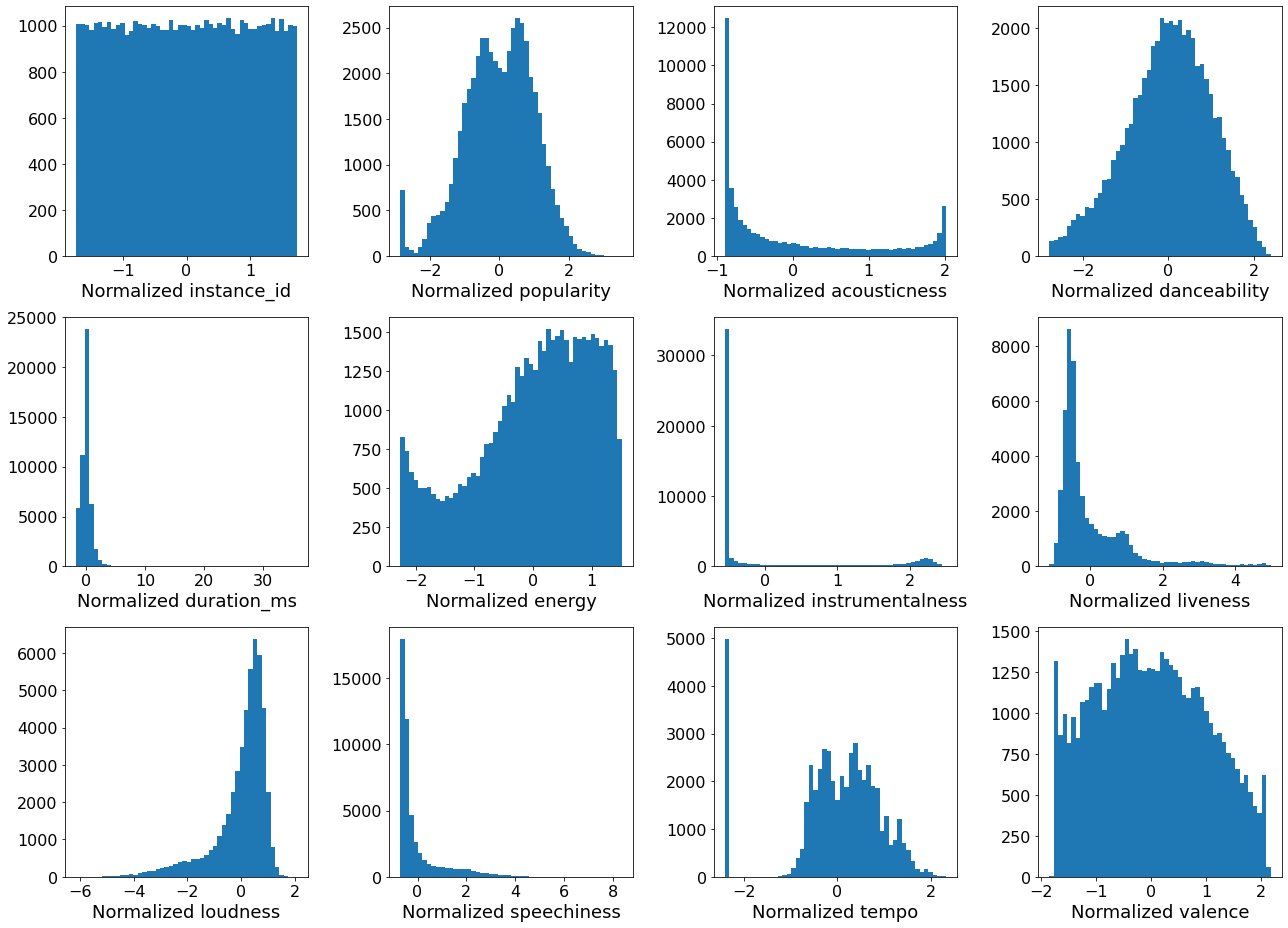

In [15]:
# Reproduce the plots
plt.figure(figsize=(18, 13))
for i, c in enumerate(numerical_features):
    plt.subplot(Nx, Ny, i+1)
    plt.hist(data[f'{c}_norm'], bins=50)
    plt.xlabel(f'Normalized {c}')
plt.tight_layout()

**2.3** Compare the distribution of dancability feature for slow and fast songs What would you conclude ? (1.5 pts)

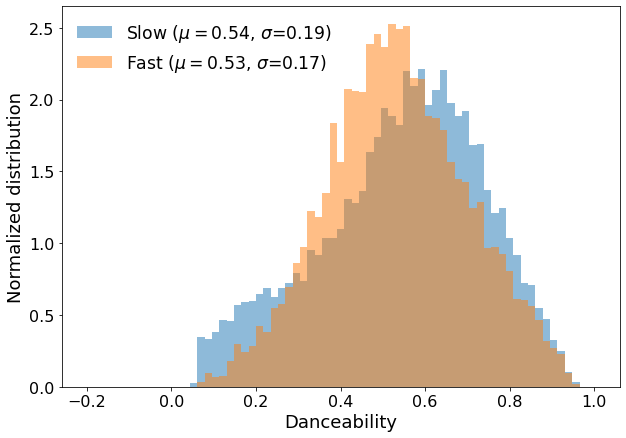

In [16]:
# First plot : 2 x 1D distribution with a cut on tempo (removing -10 tempos)

# Removing bad tempos
d = data[data.tempo>-10]

# Defining what is fast and slow
slow = d.tempo_norm < 0
fast = d.tempo_norm > 0.5

# Getting the data
dance_slow = d.loc[slow, 'danceability']
dance_fast = d.loc[fast, 'danceability']

# Making the plot
style = {'bins': np.linspace(-0.2, 1, 70), 'density': True, 'alpha': 0.5}
plt.hist(dance_slow, label=f'Slow ($\\mu={dance_slow.mean():.2f}$, $\\sigma$={dance_slow.std():.2f})', **style)
plt.hist(dance_fast, label=f'Fast ($\\mu={dance_fast.mean():.2f}$, $\\sigma$={dance_fast.std():.2f})', **style)
plt.xlabel('Danceability')
plt.ylabel('Normalized distribution')
plt.legend();

**Comments:** this is a bit hard to say (and quite dependent from the cut on the tempo), but it seems that faster song has smaller RMS in term of danceability. Let's try a second plot, fully 2D this time. A helper function computing a *profile* is first written in order to better display the result

In [17]:
def profile_x(x, y, nbinx):
    
    '''
    Computing a profile plot: ie the mean of y-values for each slice 
    along the x direction.
    
    Args:
    ----
     - x, y : 1D numpy arrays defining input data
     - nbinx: number of bins (or 1D array defining x binning)
    
    
    Returns:
    --------
     - the mean of x-values
     - the mean of y-values
     - the rms of y-values
     
    '''
    
    # Get automatic x binning in the same way that numpy
    _, x_edges, _ = np.histogram2d(x, y, bins=(nbinx, 1))

    # Defining containers for final results
    x_means, y_means, y_rms = [], [], []
    
    # Loop over the bins
    for i in range(x_edges.size-1):
    
        # Indicies of points for which x is in the current bin
        in_x_bin = (x>x_edges[i]) & (x<=x_edges[i+1])
        
        # Skip the empty x-slices
        if np.count_nonzero(in_x_bin) == 0:
            continue 
        
        # Select those points
        xvals, yvals = x[in_x_bin], y[in_x_bin]
            
        # Computes means and RMS for the current slice
        x_means.append(xvals.mean())
        y_means.append(yvals.mean())
        y_rms.append(yvals.std())

    # Return the resulting numpy array
    return np.array(x_means), np.array(y_means), np.array(y_rms)

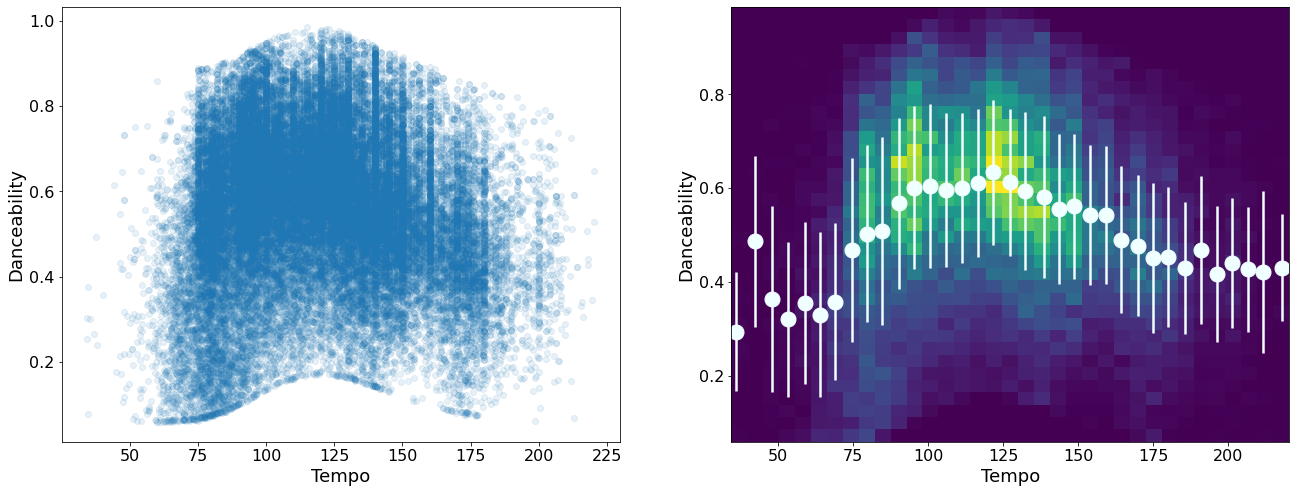

In [18]:
# Second plot: 2D plots
plt.figure(figsize=(22, 8))

# Usual scatter
plt.subplot(1, 2, 1)
plt.scatter(d.tempo, d.danceability, alpha=0.1)
plt.ylabel('Danceability')
plt.xlabel('Tempo')

# 2D histogram
plt.subplot(1, 2, 2)
Nbins = 35
plt.hist2d(d.tempo, d.danceability, bins=Nbins)
x, y, yerr = profile_x(d.tempo, d.danceability, Nbins)
plt.errorbar(x, y, yerr=yerr, marker='o', markersize=15, color='azure', linestyle='')
plt.ylabel('Danceability')
plt.xlabel('Tempo');

**Comments:** Now we can really see a clrea trend. Music with tempo around 110 have, in average, higher danceability than other tempos, which are either too slow or too fast. We can also notice that the 'plateau' at hight tempo is slightly higher than at low tempo

**2.4** Can you identify one or two features which shows a different behaviour across the music genres ? One need to determine what to plot and how to plot it, in order to answer this question (1.5 pts)

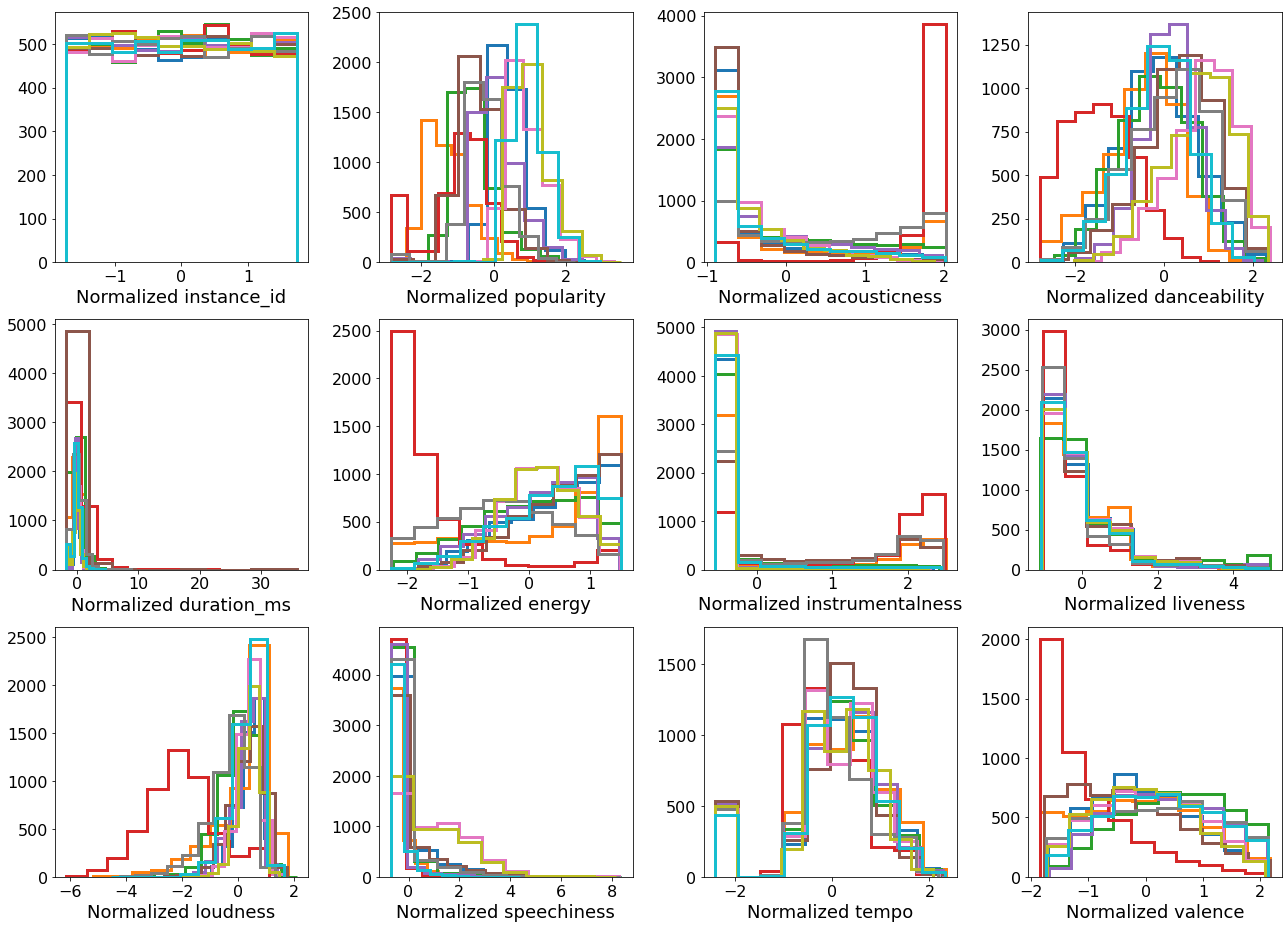

In [19]:
# Plots every numerical feature for the 10 genres
plt.figure(figsize=(18, 13))

for i, c in enumerate(numerical_features):
    plt.subplot(Nx, Ny, i+1)
    for g, d in data.groupby('music_genre'):
        plt.hist(d[f'{c}_norm'], label=g, histtype='step', linewidth=3)
    plt.xlabel(f'Normalized {c}')
plt.tight_layout()

**Comments:** 
 - the binning is automatically computed each time and is different for all styles (within the same plot)
 - most of the variables clearly shows a different distribution for different styles, but few are mostly identical :
    + instance_id
    + duration
    + tempo
    + liveness
    
We will now focus on the other ones, with proper binning to be able to analyze them. We will also now add a legend.

In [20]:
# Build the list of really discriminant variable
removed_features = ['instance_id', 'duration_ms', 'tempo', 'liveness']
discri_feat = [feat for feat in numerical_features if feat not in removed_features]

# Put by hand the binning
bins = {
    'popularity'       : np.linspace(-3, 3, 25),
    'acousticness'     : np.linspace(-1, 2, 25),
    'danceability'     : np.linspace(-3, 3, 25), 
    'energy'           : np.linspace(-3, 2, 25),
    'instrumentalness' : np.linspace(-1, 3, 25), 
    'loudness'         : np.linspace(-6, 2, 25), 
    'speechiness'      : np.linspace( 0, 8, 25), 
    'valence'          : np.linspace(-2, 2, 25),
}

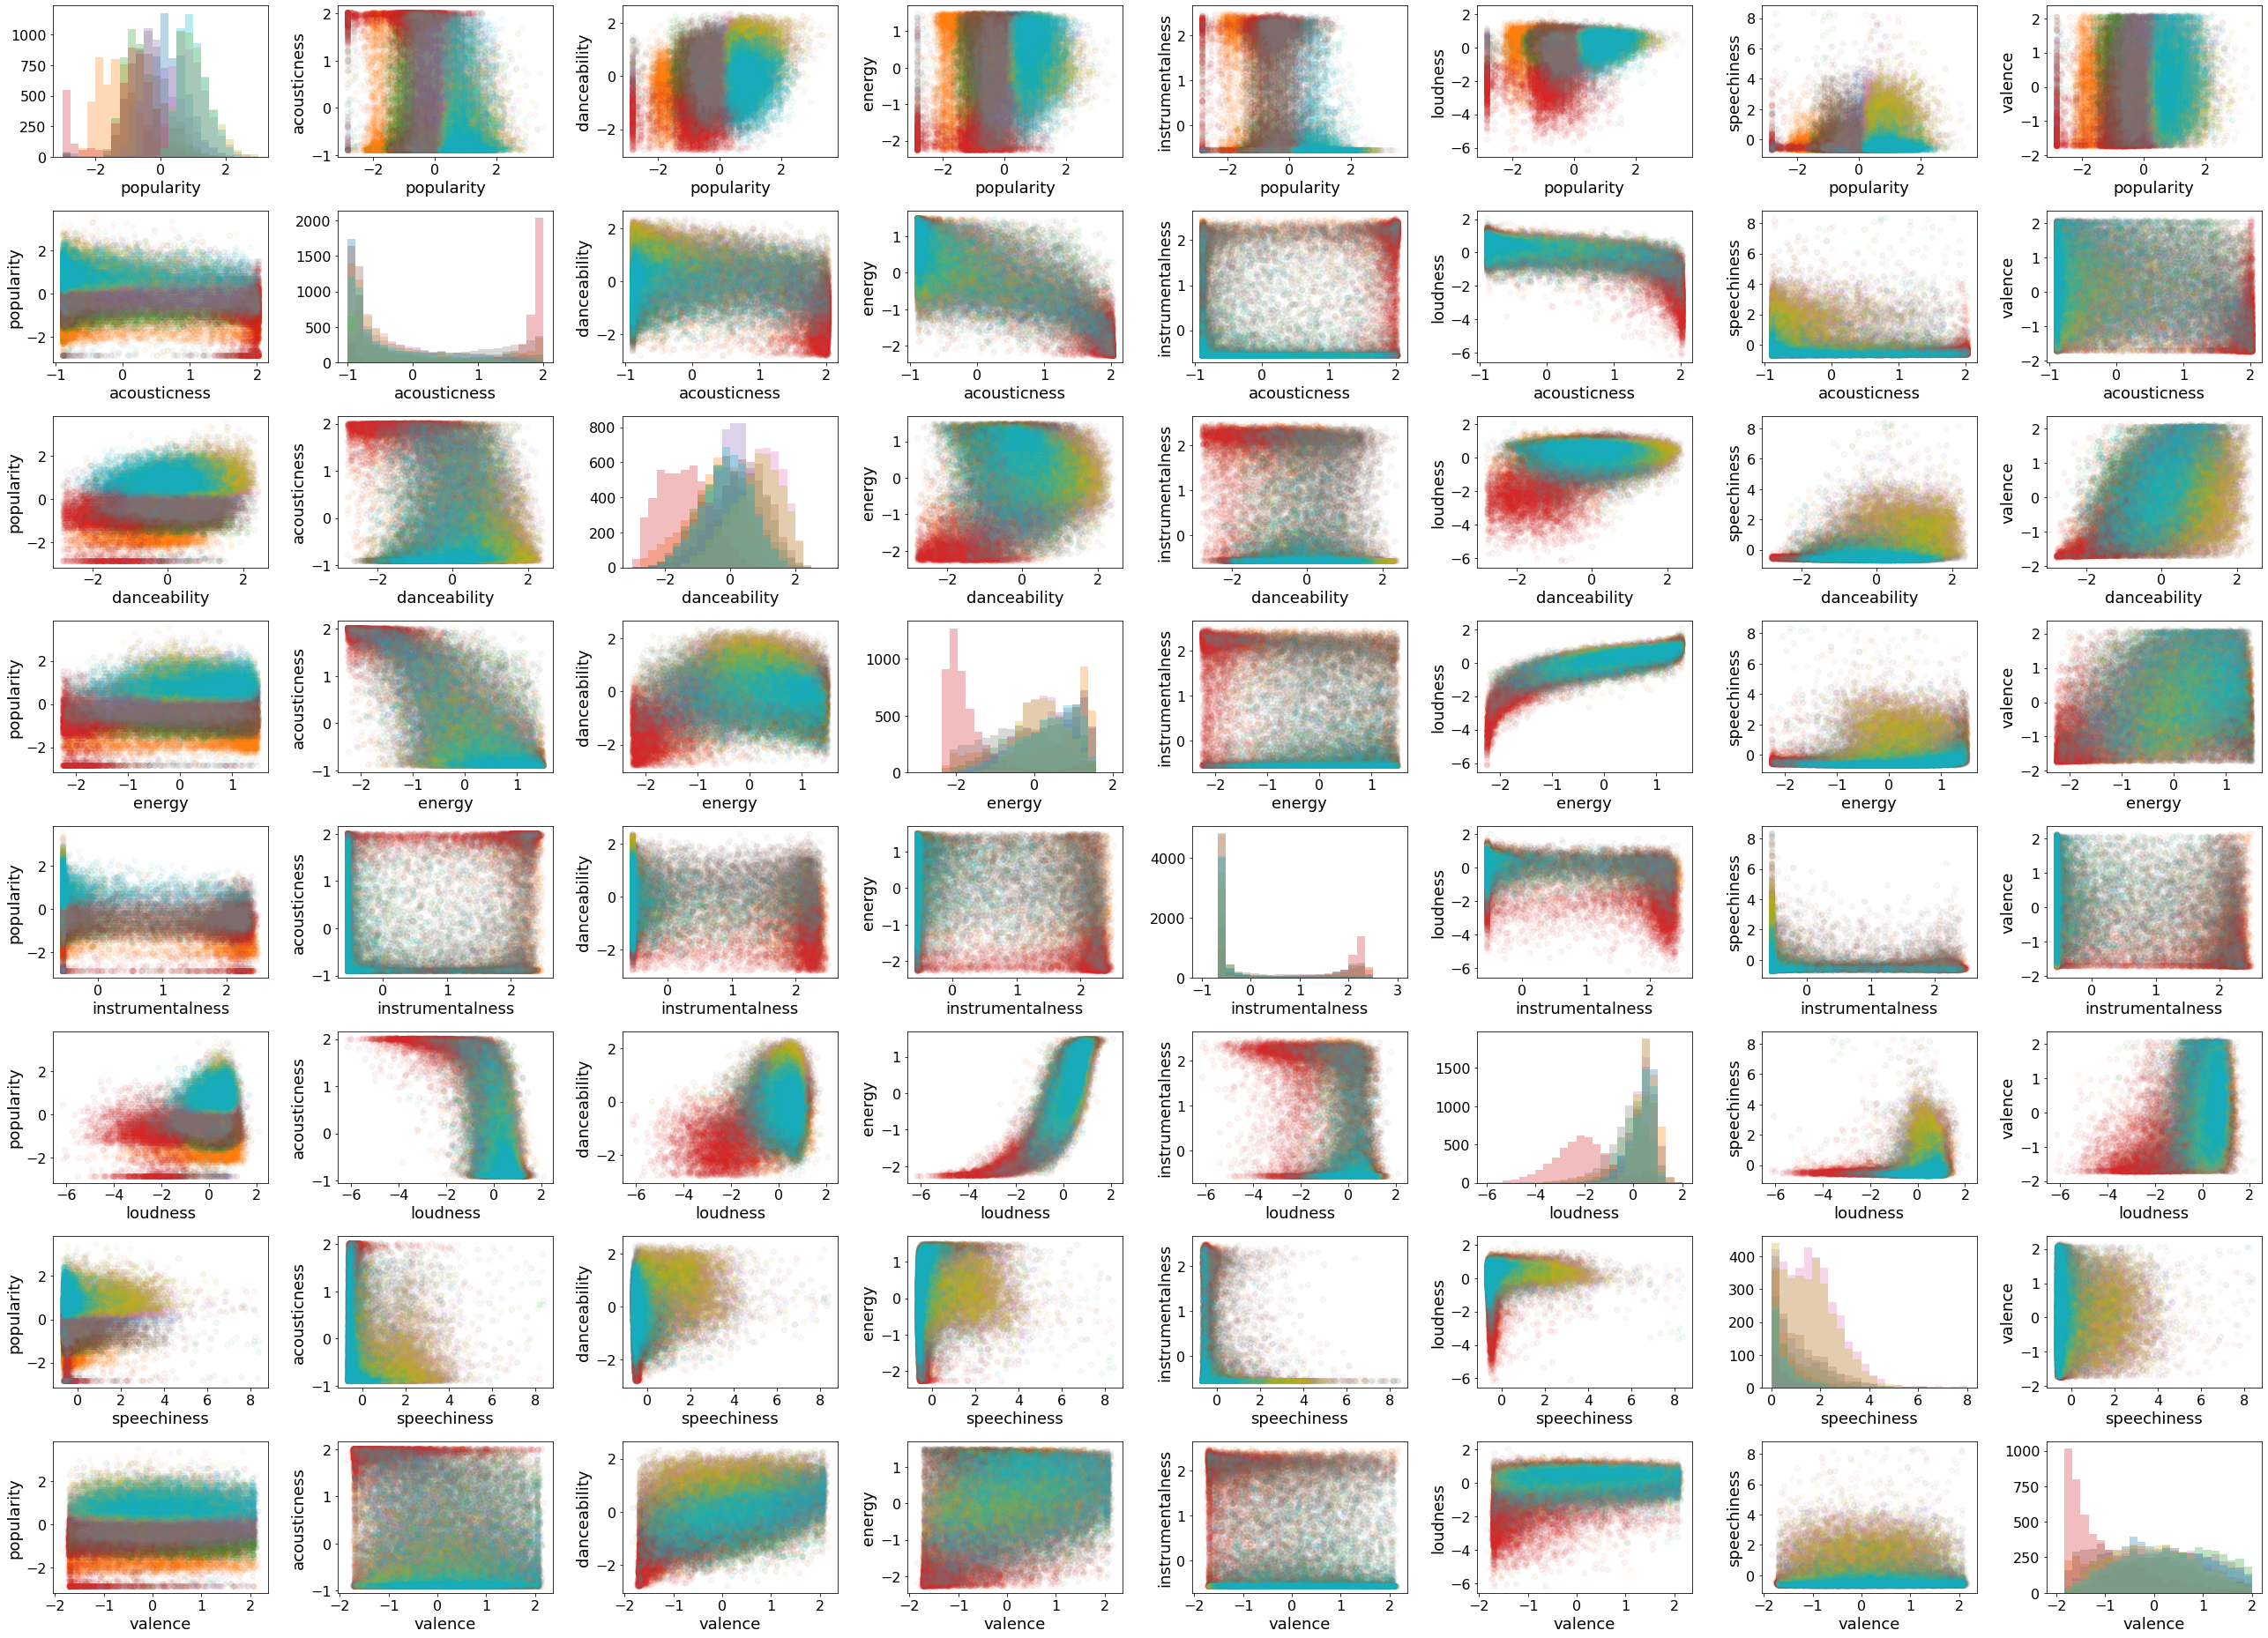

In [21]:
N = len(discri_feat)
plt.figure(figsize=(18*2, 13*2))

# Make scatter plots for the 10 categories
i = 0
for cx in discri_feat:
    for cy in discri_feat:
        i += 1
        if cx != cy :
            plt.subplot(N, N, i)
            for g, d in data.groupby('music_genre'):
                plt.scatter(d[f'{cx}_norm'], d[f'{cy}_norm'], alpha=0.05)
            plt.xlabel(cx)
            plt.ylabel(cy)
        else:
            plt.subplot(N, N, i)
            for g, d in data.groupby('music_genre'):
                plt.hist(d[f'{cx}_norm'], bins=bins[cx], alpha=0.3, linewidth=3, label=g)
            plt.xlabel(cx)

plt.tight_layout()

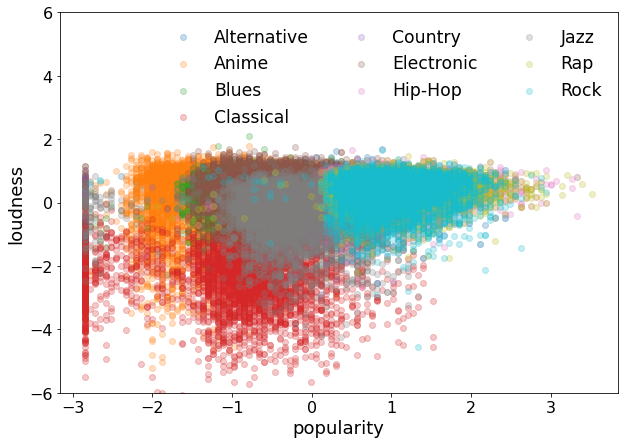

In [22]:
# Zoom on one example
cx, cy = 'popularity', 'loudness'
for g, d in data.groupby('music_genre'):
    plt.scatter(d[f'{cx}_norm'], d[f'{cy}_norm'], alpha=0.25, label=g)
plt.xlabel(cx)
plt.ylabel(cy)
plt.legend(ncol=3)
plt.ylim(-6, 6);

**2.5** One important aspect in data analysis is to avoid redundant, or correlated, features. Can you identify which the pairs of features which seems fully or partially redundant ? One would use two differents methods:
 1. numeric: by computing the correlation matrix of the features
 2. graphic: by plotting the 2D plots of each feature pairs

Can you interpret what you see ? (3 pts)

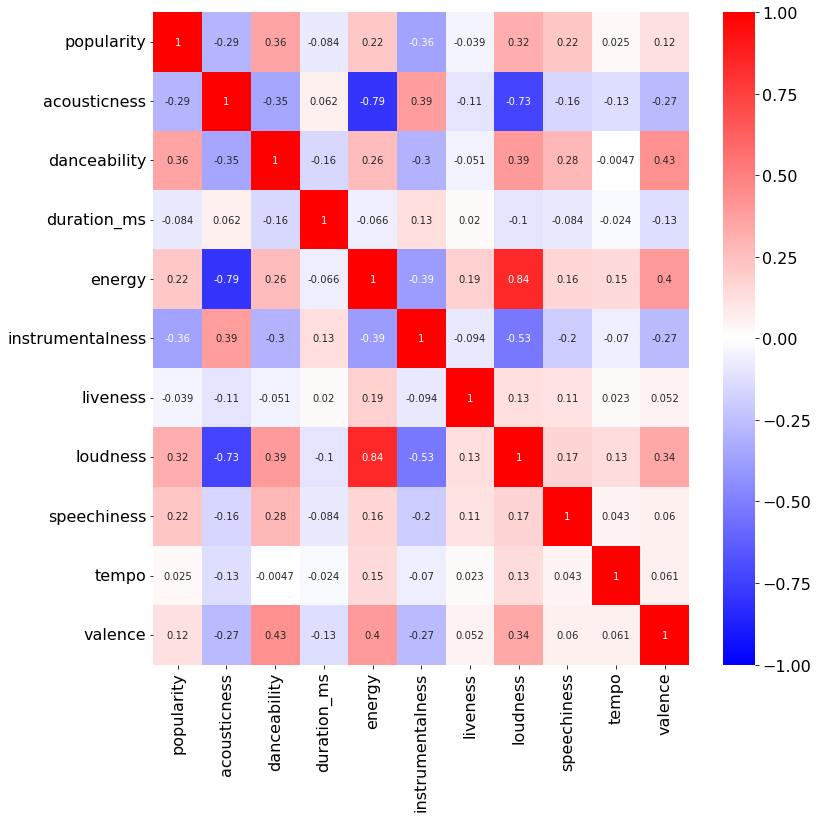

In [23]:
# Method 1 : compute the correlation matrix (and plot it with seaborn)
import seaborn as sns
numerical_features.remove('instance_id')
cor_mat = data[numerical_features].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(cor_mat, annot=True, cmap='bwr', vmin=-1, vmax=+1);

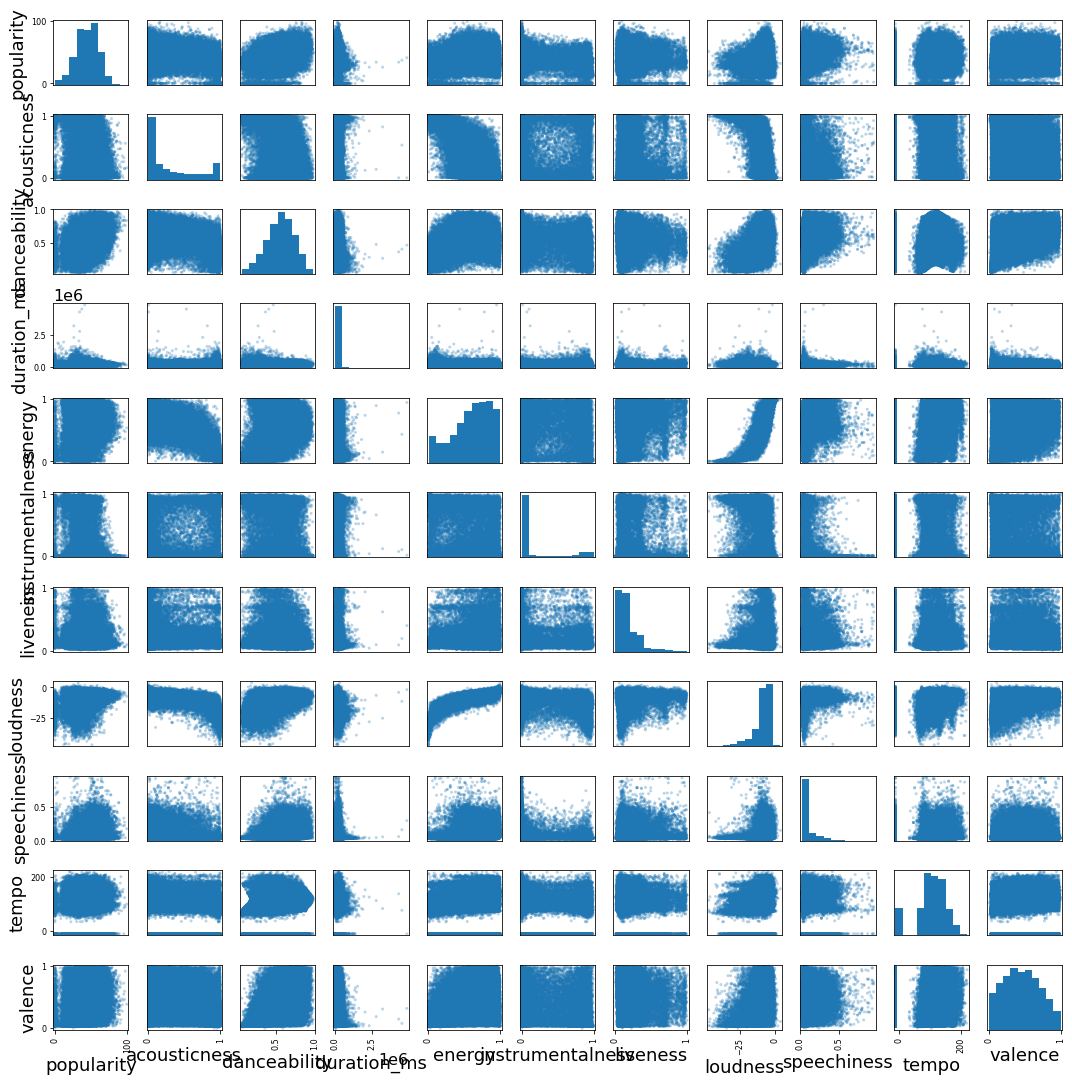

In [24]:
# Method 2 using scatter matrix from pandas library - similar to what was done question 2.4
pd.plotting.scatter_matrix(data[numerical_features], figsize=(15, 15), alpha=0.3)
plt.tight_layout()

**Comments**: the correlation matrix is easier to visualize and some trends can be identified and confirmed with the full plots. The correlation between energy, loudness and acousticnesss is relatively intuitive.

**2.6** Can you compare all feature distributions for songs with a defined tempo and those without a defined tempo ? What do you conclude ? (1 pts)

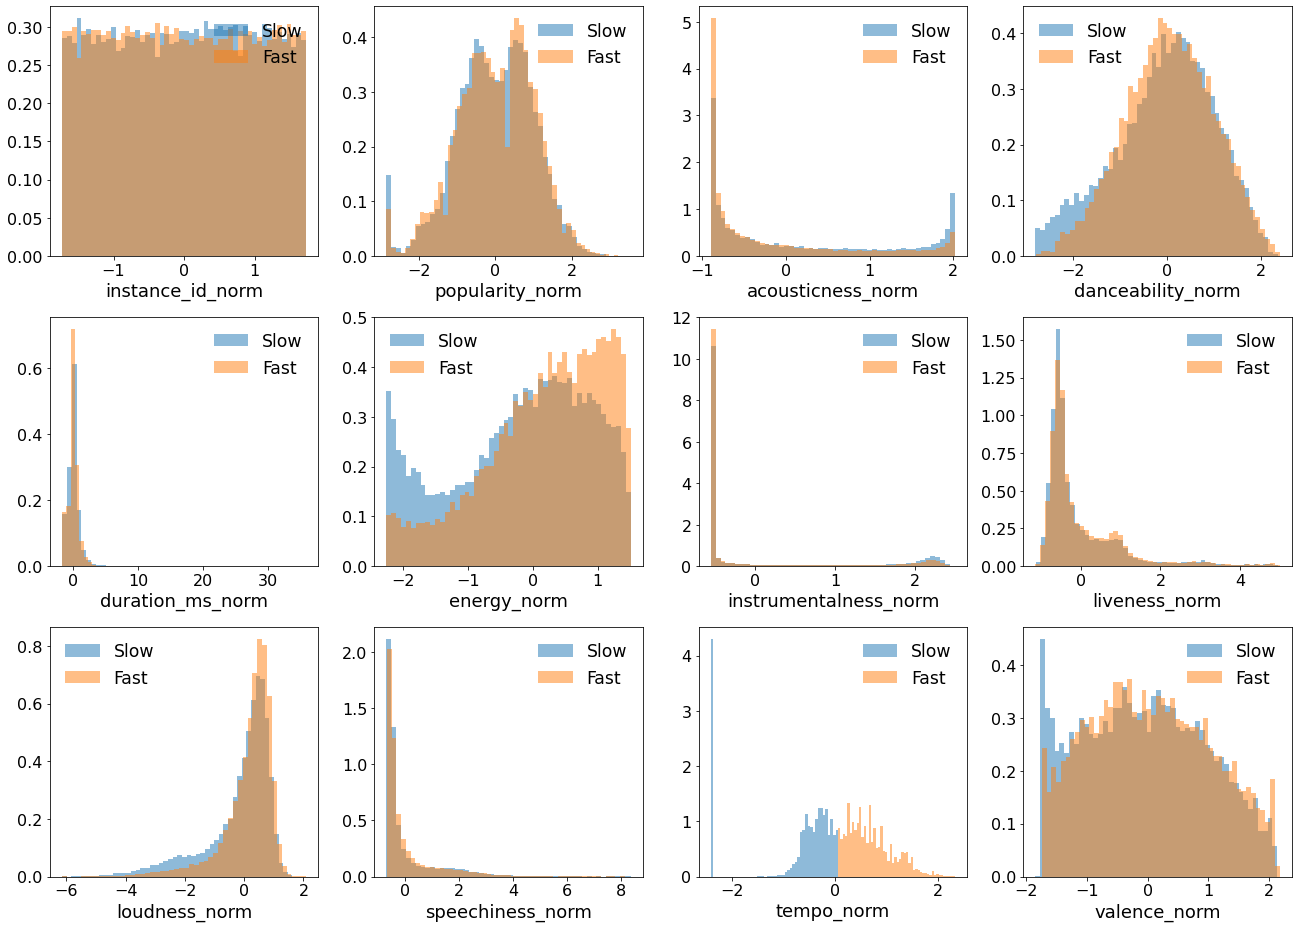

In [25]:
# Extract the list of numerical features
numerical_features = [c for c in data.columns if data[c].dtype==float and '_norm' in c]

# Get the number of plots
N = len(numerical_features)
Nsub = int(np.sqrt(N))
if Nsub**2 < N:
    Nx, Ny = Nsub, Nsub+1
else:
    Nx, Ny = Nsub, Nsub
    
# Loop over them and plot the data
plt.figure(figsize=(18, 13))
for i, c in enumerate(numerical_features):
    plt.subplot(Nx, Ny, i+1)
    slow = data['tempo']<110
    fast = ~slow
    plt.hist(data[c][slow], bins=50, alpha=0.5, density=True, label='Slow')
    plt.hist(data[c][fast], bins=50, alpha=0.5, density=True, label='Fast')
    plt.xlabel(c)
    plt.legend()
    
plt.tight_layout()

**Comments:** Distributions look rather similar except the energy, the valence and the danceability which show a higher peak at low value for slow songs.

## 3. Toward a predictive model (7 pts)

**3.1** Plot the energy *versus* the loudness for all songs inclusively, and then for each music genre separately. What do you observe (one or several observations are possible) ? (2 pts)

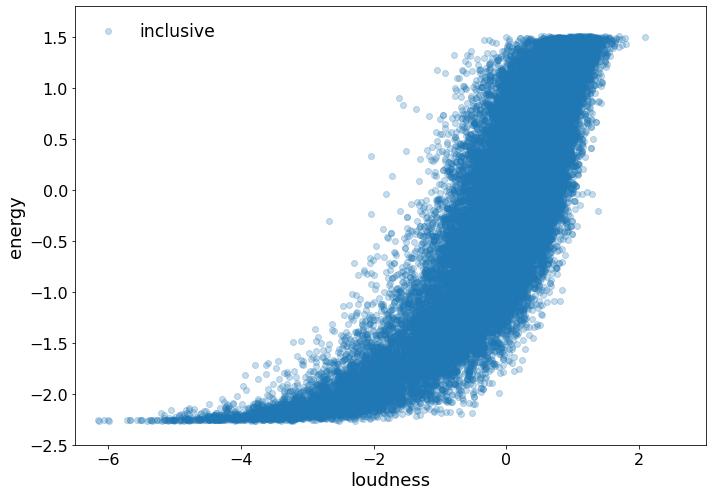

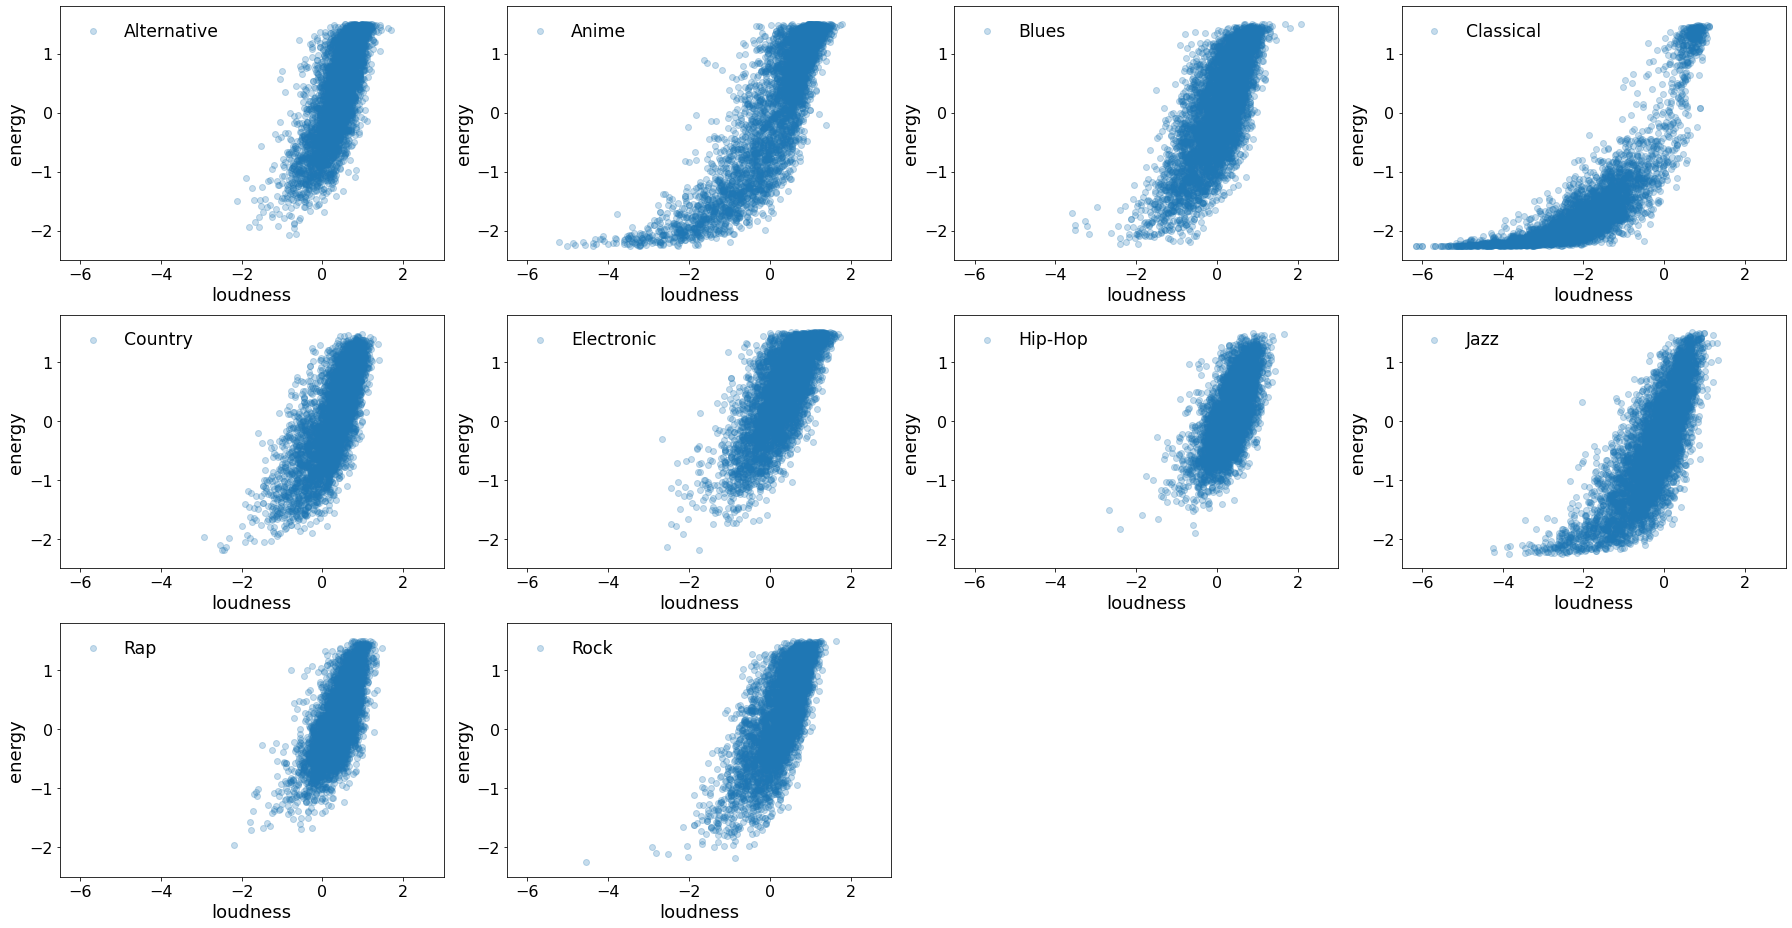

In [27]:
cx, cy = 'loudness', 'energy'

# Inclusive
plt.figure()
plt.scatter(data[f'{cx}_norm'], data[f'{cy}_norm'], alpha=0.25, label='inclusive')
plt.legend()
plt.xlim(-6.5, 3)
plt.ylim(-2.5, 1.8)
plt.xlabel(cx)
plt.ylabel(cy)
plt.tight_layout()

# Per music genre
plt.figure(figsize=(25, 13))
i=0
for g, d in data.groupby('music_genre'):
    i += 1
    plt.subplot(3, 4, i)
    plt.scatter(d[f'{cx}_norm'], d[f'{cy}_norm'], alpha=0.25, label=g)
    plt.xlabel(cx)
    plt.ylabel(cy)
    plt.xlim(-6.5, 3)
    plt.ylim(-2.5, 1.8)
    plt.legend()

plt.tight_layout()

**Conlusions:**
 1. there is a clear correlation
 2. this correlation seems similar for all style - to be further studied
 3. depending on the style, the populated region will be different

**2.3** Define a mathematical model which could reasonably well model the dependendy of the loudness with the energy. This model must have at least 2 free parameters, to be adjusted later on. (1 pts)

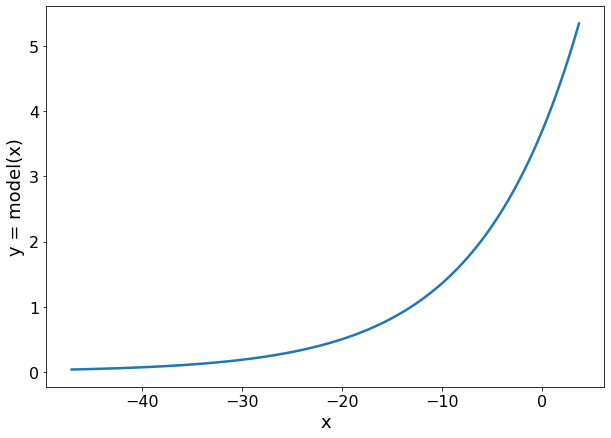

In [134]:
# Definition of the model
def model(x, *p) :
    A, B, C = p
    return A * np.exp((x - B) / C)

# Definition of x values for ploting
xs = np.linspace(data.loudness.min(), data.loudness.max(), 100)

# Plotting the model for a given set of parameter
plt.plot(xs, model(xs, 10, 10, 10))
plt.xlabel('x')
plt.ylabel('y = model(x)');

**2.4** Define a loss function which describes how well the model describe the data, for a give value of the paramters. Plot this loss function *versus* the first parameter, when the other were fixed to a value of your choice. (2 pts)

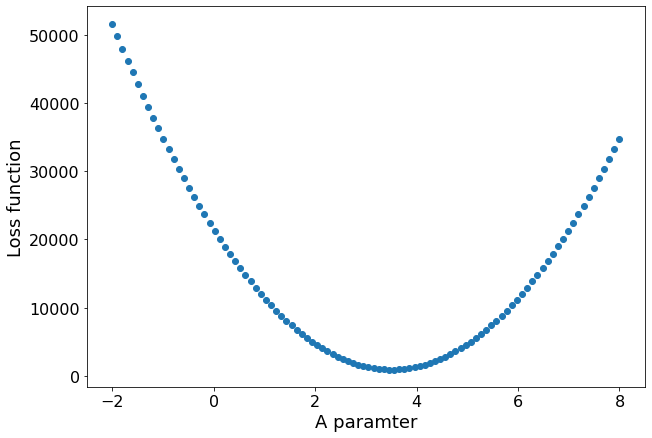

In [155]:
# Get the data to be fitted
xdata, ydata = data.loudness.values, data.energy.values

# Define the loss function
def loss(p, Xs, Ys):
    dy2 = (Ys - model(Xs, *p))**2
    return np.sum(dy2)

# Plotting the loss function vs A for (B, C) = (10, 10)
As, B0, C0 = np.linspace(-2, 8, 100), 10, 10
Chi2s = np.array( [loss([A, B0, C0], xdata, ydata) for A in As] )
plt.plot(As, Chi2s, 'o')
plt.xlabel('A paramter')
plt.ylabel('Loss function');

**2.5** Using the `scipy.optimize` module, find the best value of the parameter which describes the data:
 + in an inclusive way (all music genres together)
 + for each music genre
Do you think you can identify the genre of a song based of its loundess and energy values ? (2 pts)

In [160]:
from scipy import optimize

def fit_data(Xs, Ys, plot=False):

    '''
    Fitting some data using the above defined model and loss function.
    
     - Xs, Ys : array corresponding the to-be-fitted data
     - returns: best parameter values, and the minimal 
                value of the loss function
    '''
    
    # Initial parameters
    p0 = [1e-3, 10, 10]

    # Loss function arguments (other than parameters)
    args = (Xs, Ys)

    # Actual minimization
    res = optimize.minimize(loss, p0, args=args)

    # Get the result and plotting the data+fit
    if plot:
        Af, Bf, Cf = res.x
        plt.scatter(Xs, Ys, alpha=0.05, label='Data')
        lab = f'Model'
        plt.plot(xs, model(xs, Af, Bf, Cf), color='tab:red', label=lab)
        plt.ylim(-0.05, 1.2)
        plt.legend()
        plt.xlabel('Loudness')
        plt.ylabel('Energy');
    
    return res.x, res.fun

(array([ 2.10625245,  6.84050854, 11.80758748]), 894.7254080117788)

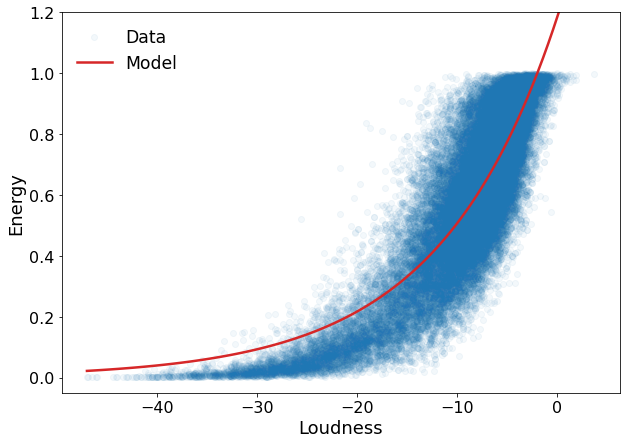

In [161]:
# Testing inclusive-genre fit
fit_data(xdata, ydata, plot=True)

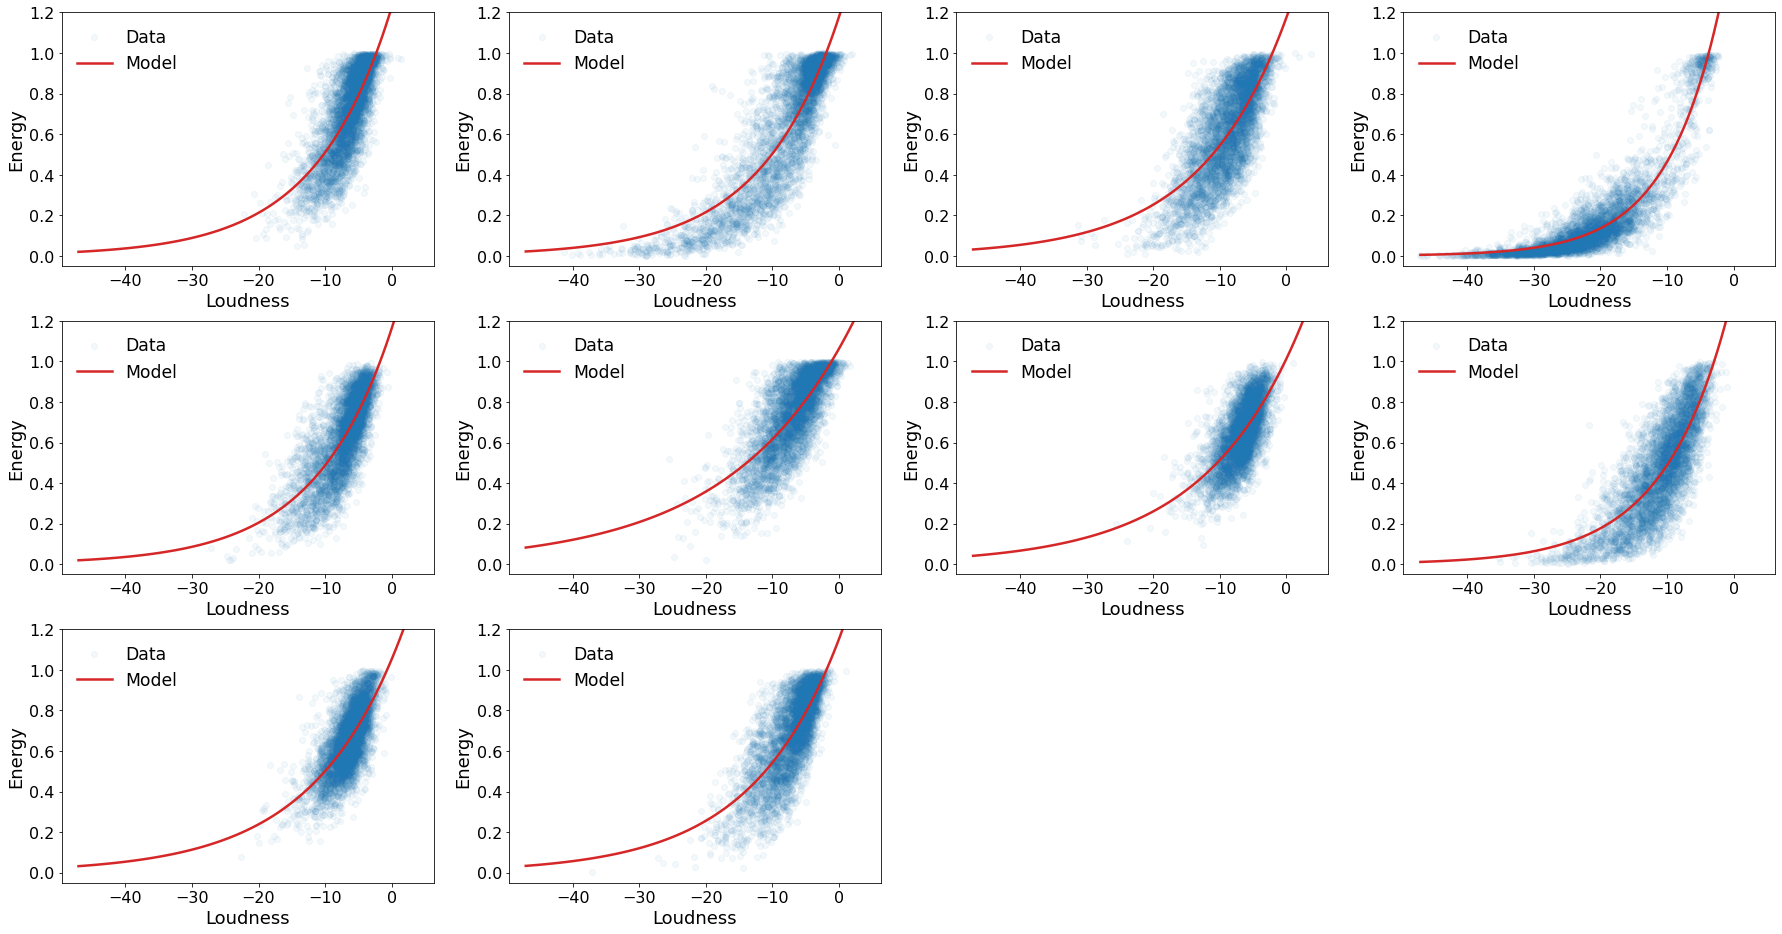

In [166]:
# Store all fit restults
fit_res = {}

# Fit per music genre
plt.figure(figsize=(25, 13))
for i, (g, d) in enumerate(data.groupby('music_genre')):
    plt.subplot(3, 4, i+1)
    fit_res[g] = fit_data(d.loudness.values, d.energy.values, plot=True)
plt.tight_layout()

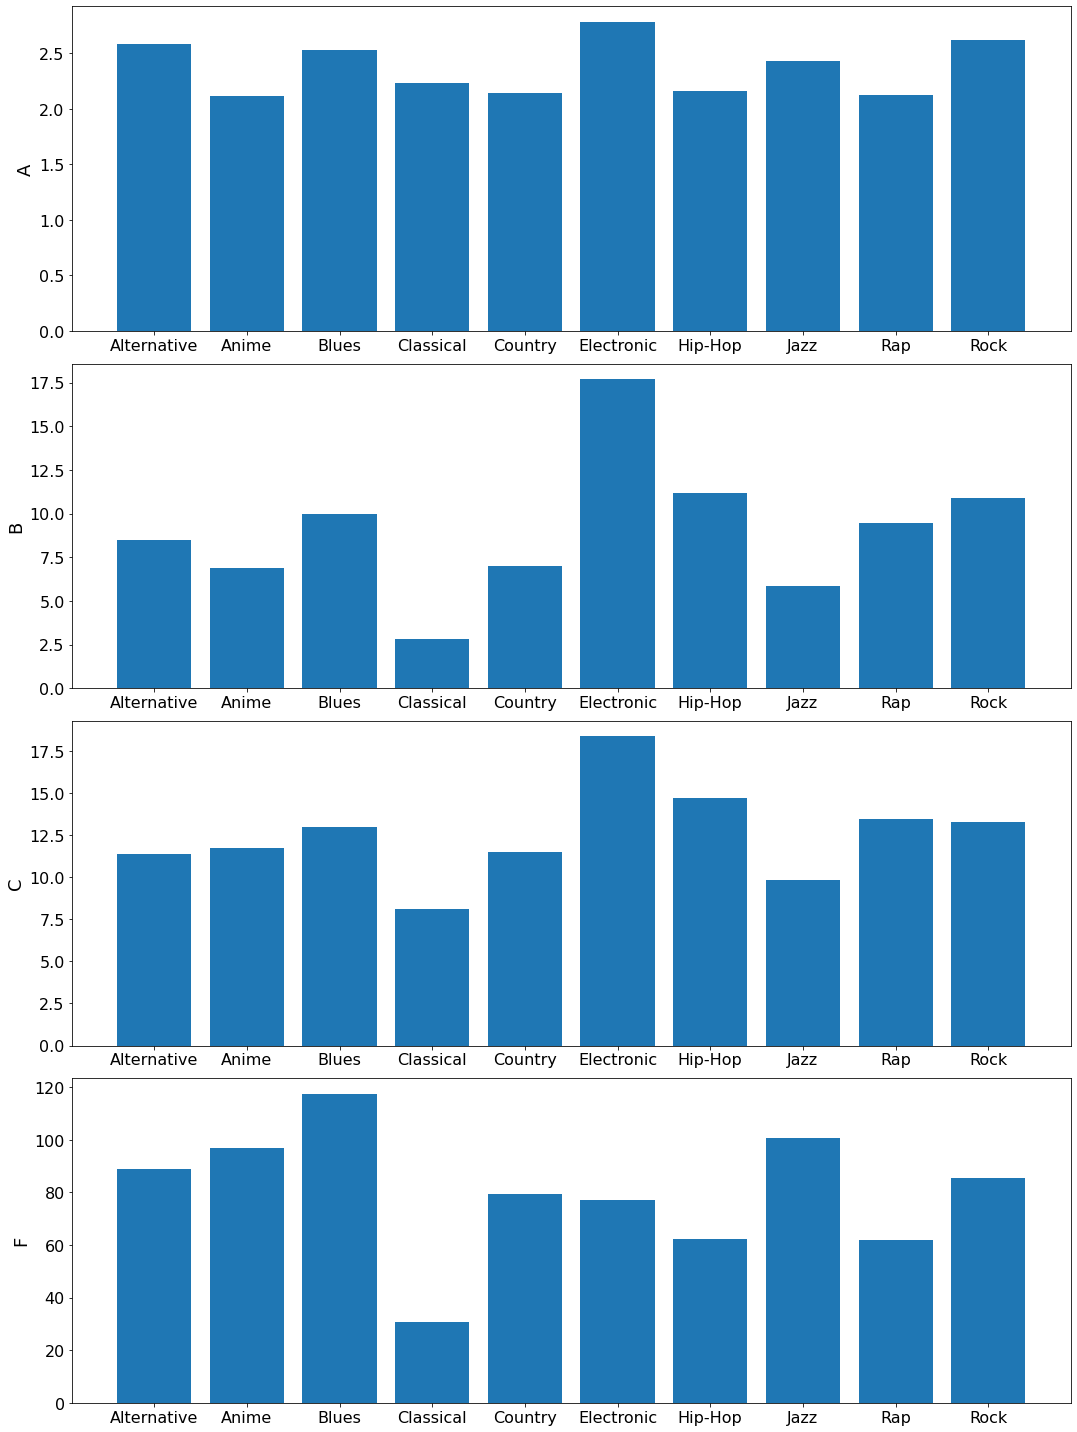

In [189]:
# Analyze fit result per genre

# 1. Unpack the data
Gs, As, Bs, Cs, Fs = [], [], [], [], []
for k, v in fit_res.items():

    # Genre
    Gs.append(k)

    # Parameters
    pars = v[0]
    As.append(pars[0])
    Bs.append(pars[1])
    Cs.append(pars[2])

    # Minimal function
    Fs.append(v[1])


# 2. Produce bar plots
x_pos = np.arange(len(Gs))
plt.figure(figsize=(15, 20))
for i, (y_pos, y_lab) in enumerate(zip([As, Bs, Cs, Fs],['A', 'B', 'C', 'F'])):
    plt.subplot(4, 1, i+1)
    plt.bar(x_pos, y_pos)
    plt.xticks(x_pos, Gs)
    plt.ylabel(y_lab)
plt.tight_layout();

**Comments:**
 1. The minimum function shows that the fit works better for classical music than for other styles (confirmed by eyes, looking at the plots)
 2. Parameters A and C doesn't really depend on the style, but parmeter B has a bit more variability. We could think of using this variability to identify the music genre from these two variables.

## 4. Bonus question (3 pts)

Using the tool of you choice, can you build a model which predicts the music genre, knowing all the features of a song ? One would try to caracterize the quality of the classifier model.